In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt

## 선형관계인 데이터로 훈련시키기

In [43]:
x = np.array([0, 1, 2, 3, 4])
y = 2 * x + 1

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
epochs = 100

model = Sequential()
# 하나의 인풋을 받아서 하나의 아웃풋을 내놓는 가장 간단한 신경망
model.add(Dense(1, input_shape=(1,)))

# 최적화 방법: Stochastic Gradient Descent, 손실함수:  Mean Square Error
model.compile(optimizer='SGD', 
                      loss='mse',
                     )

history = model.fit(x[:2], y[:2], 
                            validation_data=(x[2:], y[2:]), epochs=epochs, batch_size=1, verbose=0)
print(history.history.keys())
print('val_loss : {:.3f}'.format(history.history['val_loss'][-1]))

dict_keys(['val_loss', 'loss'])
val_loss : 0.217


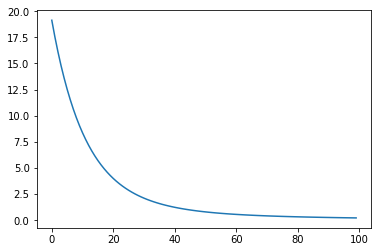

In [49]:
plt.plot(range(epochs), history.history['val_loss'])
plt.show()

In [50]:
model.predict([4,5])  # expected value is 9 and 11

array([[ 8.376375],
       [10.19436 ]], dtype=float32)

## 다변량 선형 회귀

선형회귀에서는 주어진 피처 x 에 대해서 출력값(Y)가 선형관계를 갖는 것을 가정합니다.

하지만 x 에 대해서 비선형인 관계를 갖는 데이터도 존재합니다.

자동차 속도에 대한 연비 데이터가 있다면 물리적으로 단순한 선형 관계는 아니라는 것을 알 수 있습니다.

이럴 때는 비선형 항을 추가해야 합니다. 비선형항에는 제곱근, 로그, 다항식(2차, 3차... ) 등을 사용할 수 있습니다.

그래프를 보고 어떤 비선형 항이 들어갈 지를 정한 후에 기본 피처 x 데이터로부터 비선형항을 계산한 후에 새로운 추가 피처로 입력 데이터에 포함시켜서 선형회귀를 합니다.

실제 어떤 과정을 거치는지 실습해보겠습니다.

먼저 난수를 사용해서 비선형 모습을 한 데이터를 만들겠습니다.

In [53]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(137)

num = 100

x = np.random.uniform(0,10,num)

a = np.random.normal(1,3,num)
    
b = np.random.uniform(0,5,num)    

y = x **2 + 3* x * np.sin(x) + b ** 2

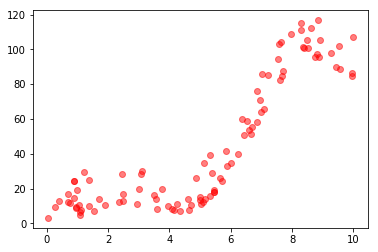

In [54]:
plt.plot(x, y, 'ro', alpha=0.5)
plt.show()

In [55]:
def poly(x, n):
    assert n >= 1
    poly_term = [x]
    for i in range(n - 1):
        poly_term.append( x ** (i+2))
    poly_term = tuple(poly_term)
    return np.row_stack(poly_term).T

In [57]:
poly(np.array([1,2,3]), 2)

array([[1, 1],
       [2, 4],
       [3, 9]])

In [71]:
def poly_regression(x, y, n_poly, epochs=100):
    train_X = poly(x, n_poly)
    train_Y = y
    
    model = Sequential()
    model.add(Dense(64, activation='relu',
                           input_shape=(train_X.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    history = model.fit(train_X, train_Y,
                       epochs=epochs, batch_size=1, verbose=0)
    # mae_history = history.history['val_mean_absolute_error']
    # print(history.history.keys()) # dict_keys(['mean_absolute_error', 'loss'])
    pred_Y = model.predict(train_X)
    
    plt.plot(x, y, 'ro', alpha=0.5)
    plt.plot(x, pred_Y, 'bo')
    plt.show()

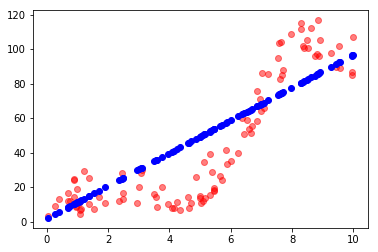

In [77]:
poly_regression(x,y , 1,epochs=10)

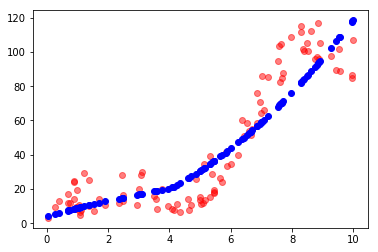

In [78]:
poly_regression(x,y , 2,epochs=10)

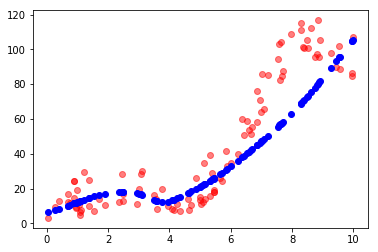

In [82]:
poly_regression(x,y , 3,epochs=20)

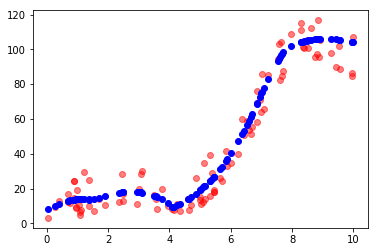

In [80]:
poly_regression(x,y , 3,epochs=100)